# Data Analysis with `pandas`

`pandas` is the most common package used in data analysis, with a focus on data manipulation and processing. We have alluded to `pandas` when talking about DataFrames and libraries. Now we will dive into a few key concepts in the `pandas` package.

To learn more, check out D-Lab's [Python Data Wrangling workshop](https://github.com/dlab-berkeley/Python-Data-Wrangling).

In [1]:
# recall that pandas is frequently imported with the alias pd
import pandas as pd
import numpy as np

For now, let's use an existing dataset, the [penguins dataset](https://www.kaggle.com/datasets/parulpandey/palmer-archipelago-antarctica-penguin-data?resource=download&select=penguins_size.csv)! The dataset consists of body measurements for three penguin species (Adelie, Chinstrap, Gentoo). We will load in the file and use `df.head()` to look at the first few items.

The data has the following columns: 

- Species (Adelie, Gentoo, Chinstrap)
- Island
- Culmen Length (mm)
- Culmen Depth (mm)
- Flipper Length (mm)
- Body Mass (g)
- Sex (Male / Female)

If you were wondering, the culmen is the top part of the penguin's bill!

**Qeustion:** How many rows/columns are in the data set?

In [2]:
penguins = pd.read_csv('penguins.csv')
penguins.head()

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,MALE
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,FEMALE
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,FEMALE
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,FEMALE


## DataFrame Methods

Just like other objects, `DataFrames` have a series of methods that are associated with them. There are many methods for summarizing `pd.DataFrames`. For example [`df.describe()`](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.describe.html) will give some summary statistics for a column. Let's look at how `.describe()` works on the `penguins` DataFrame.


**Question:** Why are only some of the columns in the DataFrame visible in the output below?

In [3]:
penguins.describe()

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g
count,342.000000,342.000000,342.000000,342.000000
mean,43.921930,17.151170,200.915205,4201.754386
std,5.459584,1.974793,14.061714,801.954536
min,32.100000,13.100000,172.000000,2700.000000
25%,39.225000,15.600000,190.000000,3550.000000
50%,44.450000,17.300000,197.000000,4050.000000
75%,48.500000,18.700000,213.000000,4750.000000
max,59.600000,21.500000,231.000000,6300.000000


This function is good for summarizing numerical data in a dataset. However, sometimes this might not be enough. For example, what if we wanted the median of the penguin mass rather than the mean? 

First, let's select just one column to operate on. We can select an individual column with bracket notation. This is analogous to indexing a list.

**Question:** What is the type of the output?

In [4]:
penguins['body_mass_g']

0      3750.0
1      3800.0
2      3250.0
3         NaN
4      3450.0
        ...  
339       NaN
340    4850.0
341    5750.0
342    5200.0
343    5400.0
Name: body_mass_g, Length: 344, dtype: float64

A single column of pandas is a `Series` object. This can be treated as a list or other iterable, and allows for you to do calculations over it. 

We can then look at the [documentation](https://pandas.pydata.org/docs/reference/api/pandas.Series.html) to see the methods and attributes that are available for `Series` objects. If we want the median, we can use the `.median()` function.

In [5]:
penguins['body_mass_g'].hasnans

True

In [6]:
penguins['body_mass_g'].median()

4050.0

We can also do operations on a column. 

**Question:** What will happen in the code below? What is the type/shape of the output?

In [7]:
penguins['body_mass_g']/1000

0      3.75
1      3.80
2      3.25
3       NaN
4      3.45
       ... 
339     NaN
340    4.85
341    5.75
342    5.20
343    5.40
Name: body_mass_g, Length: 344, dtype: float64

In [8]:
penguins['body_mass_g'] = penguins['body_mass_g']/1000
penguins.describe()

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g
count,342.000000,342.000000,342.000000,342.000000
mean,43.921930,17.151170,200.915205,4.201754
std,5.459584,1.974793,14.061714,0.801955
min,32.100000,13.100000,172.000000,2.700000
25%,39.225000,15.600000,190.000000,3.550000
50%,44.450000,17.300000,197.000000,4.050000
75%,48.500000,18.700000,213.000000,4.750000
max,59.600000,21.500000,231.000000,6.300000


This is called a **vectorized operation:** where the operation is applied to each element of the column. This allows you to efficiently apply operations to every item of the Series. However, knowing when something will be vectorized and when it won't can sometimes be a challenge. 

A variation on this is an operation containing two columns. Let's say we want to take the ratio of the culmen length and depth for all of the penguins.

**Question:** The code below has two errors in it. What is it trying to do, and how do you fix it?

In [9]:
penguins['culmen_ratio'] = penguins['culmen_length_mm']/penguins['culmen_depth_mm']
penguins['culmen_ratio']

0      2.090909
1      2.270115
2      2.238889
3           NaN
4      1.901554
         ...   
339         NaN
340    3.272727
341    3.210191
342    3.054054
343    3.099379
Name: culmen_ratio, Length: 344, dtype: float64

In [10]:
penguins.describe()

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,culmen_ratio
count,342.000000,342.000000,342.000000,342.000000,342.000000
mean,43.921930,17.151170,200.915205,4.201754,2.605649
std,5.459584,1.974793,14.061714,0.801955,0.497375
min,32.100000,13.100000,172.000000,2.700000,1.639810
25%,39.225000,15.600000,190.000000,3.550000,2.160344
50%,44.450000,17.300000,197.000000,4.050000,2.575067
75%,48.500000,18.700000,213.000000,4.750000,3.098777
max,59.600000,21.500000,231.000000,6.300000,3.612676


## Challenge 1: Methods

For each of the following methods, answer the following questions:
1. Is the method operating on a `DataFrame` or a `Series` object?
2. Look up the documentation. What type is the output?
3. Run the method. Note any discrepancies from your prediction.
**Bonus:** If you run the method on the opposite type, what happens? (runs-same output, runs-different output, error)

penguins['species'].value_counts(ascending=True)

In [12]:
penguins.isnull()

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex,culmen_ratio
0,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False
3,False,False,True,True,True,True,True,True
4,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...
339,False,False,True,True,True,True,True,True
340,False,False,False,False,False,False,False,False
341,False,False,False,False,False,False,False,False
342,False,False,False,False,False,False,False,False


In [13]:
penguins.dropna()

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex,culmen_ratio
0,Adelie,Torgersen,39.1,18.7,181.0,3.750,MALE,2.090909
1,Adelie,Torgersen,39.5,17.4,186.0,3.800,FEMALE,2.270115
2,Adelie,Torgersen,40.3,18.0,195.0,3.250,FEMALE,2.238889
4,Adelie,Torgersen,36.7,19.3,193.0,3.450,FEMALE,1.901554
5,Adelie,Torgersen,39.3,20.6,190.0,3.650,MALE,1.907767
...,...,...,...,...,...,...,...,...
338,Gentoo,Biscoe,47.2,13.7,214.0,4.925,FEMALE,3.445255
340,Gentoo,Biscoe,46.8,14.3,215.0,4.850,FEMALE,3.272727
341,Gentoo,Biscoe,50.4,15.7,222.0,5.750,MALE,3.210191
342,Gentoo,Biscoe,45.2,14.8,212.0,5.200,FEMALE,3.054054


In [14]:
penguins['species'].str[0]

0      A
1      A
2      A
3      A
4      A
      ..
339    G
340    G
341    G
342    G
343    G
Name: species, Length: 344, dtype: object

There are easily several hundred methods asociated with `DataFrames` and `Series`. For this reason, it is impractical to try to memorize every function and its arguments. Rather, it is often more productive to focus on developing (1) an understanding of what is possible with Python and (2) the ability to learn how to implement new functions by reading documentation, examples, etc.

## Challenge 2: Categorical --> Numeric data

1) Recall that in the penguins data set, there was one column that had two values 'MALE' and 'FEMALE'. Let's say that for a model, we want to replace the string values with numbers (FEMALE = 0; MALE = 1) that will serve as input to the model. Look at the [documentation](https://pandas.pydata.org/docs/reference/api/pandas.Series.html) and identify a method to *replace* the strings with their corresponding numbers. Then try to implement the method. What roadblocks do you run across?

In [15]:
#YOUR CODE HERE
penguins['sex_numeric'] = penguins['sex'].replace({'FEMALE':0,'MALE':1})
penguins.head

<bound method NDFrame.head of     species     island  culmen_length_mm  culmen_depth_mm  flipper_length_mm  \
0    Adelie  Torgersen              39.1             18.7              181.0   
1    Adelie  Torgersen              39.5             17.4              186.0   
2    Adelie  Torgersen              40.3             18.0              195.0   
3    Adelie  Torgersen               NaN              NaN                NaN   
4    Adelie  Torgersen              36.7             19.3              193.0   
..      ...        ...               ...              ...                ...   
339  Gentoo     Biscoe               NaN              NaN                NaN   
340  Gentoo     Biscoe              46.8             14.3              215.0   
341  Gentoo     Biscoe              50.4             15.7              222.0   
342  Gentoo     Biscoe              45.2             14.8              212.0   
343  Gentoo     Biscoe              49.9             16.1              213.0   

     body

2)  Notice that there are some 'NaN' values in the `Series`. You do some research and identify three possible solutions to deal with the NaN values (listed below). For each of the options, describe what will happen to NaN values in the column, and the DataFrame as a whole. Which option seems most appropriate?

Consider the following:
- Is the whole DataFrame or just the column (Series) being operated on?
- What exactly are happening to the NaN values?
- What are the consequences, if any, for the solution in the hypothetical model? 

**Hint:** The documentation is your friend!

In [16]:
penguins['sex'].replace(['MALE','FEMALE',np.nan],[1,0,2])

0      1
1      0
2      0
3      2
4      0
      ..
339    2
340    0
341    1
342    0
343    1
Name: sex, Length: 344, dtype: object

In [17]:
penguins.dropna(subset = 'sex') ##Drops all 

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex,culmen_ratio,sex_numeric
0,Adelie,Torgersen,39.1,18.7,181.0,3.750,MALE,2.090909,1
1,Adelie,Torgersen,39.5,17.4,186.0,3.800,FEMALE,2.270115,0
2,Adelie,Torgersen,40.3,18.0,195.0,3.250,FEMALE,2.238889,0
4,Adelie,Torgersen,36.7,19.3,193.0,3.450,FEMALE,1.901554,0
5,Adelie,Torgersen,39.3,20.6,190.0,3.650,MALE,1.907767,1
...,...,...,...,...,...,...,...,...,...
338,Gentoo,Biscoe,47.2,13.7,214.0,4.925,FEMALE,3.445255,0
340,Gentoo,Biscoe,46.8,14.3,215.0,4.850,FEMALE,3.272727,0
341,Gentoo,Biscoe,50.4,15.7,222.0,5.750,MALE,3.210191,1
342,Gentoo,Biscoe,45.2,14.8,212.0,5.200,FEMALE,3.054054,0


In [18]:
penguins.fillna(2)

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex,culmen_ratio,sex_numeric
0,Adelie,Torgersen,39.1,18.7,181.0,3.75,MALE,2.090909,1
1,Adelie,Torgersen,39.5,17.4,186.0,3.80,FEMALE,2.270115,0
2,Adelie,Torgersen,40.3,18.0,195.0,3.25,FEMALE,2.238889,0
3,Adelie,Torgersen,2.0,2.0,2.0,2.00,2,2.000000,2
4,Adelie,Torgersen,36.7,19.3,193.0,3.45,FEMALE,1.901554,0
...,...,...,...,...,...,...,...,...,...
339,Gentoo,Biscoe,2.0,2.0,2.0,2.00,2,2.000000,2
340,Gentoo,Biscoe,46.8,14.3,215.0,4.85,FEMALE,3.272727,0
341,Gentoo,Biscoe,50.4,15.7,222.0,5.75,MALE,3.210191,1
342,Gentoo,Biscoe,45.2,14.8,212.0,5.20,FEMALE,3.054054,0


**Question:** What was the most helpful tool/strategy for figuring out which method to use?

## Selecting Columns and Rows

We can use `.loc[row, column]` to index columns and rows in the DataFrame. This is a complex topic, so we will cover just the most common case here. Most commonly, `.loc[]` is used to subset to a selection of rows in the DataFrame. 

In this case, use a **Boolean mask** to represent which rows to select. A Boolean mask is an operation that takes as input a series and a condition, and outputs a series with `True` where that condition is met and `False` elsewhere. Sound familiar? The function `.isnull()` is a function that uses Boolean masks! 

We can use Boolean masks with `.loc[]` to subset our DataFrames! For example, let's say that we want to measure some variables for penguins found on Torgersen island. Then we would simply select that column and use `==` to check if the island variable in that column is exactly 'Torgersen'. **Note:** How this is formulated now, this has to be an *exact* match.


In [19]:
penguins['island']=='Torgersen'

0       True
1       True
2       True
3       True
4       True
       ...  
339    False
340    False
341    False
342    False
343    False
Name: island, Length: 344, dtype: bool

Then to get the subset of the entire `penguins` object, we can pass this Boolean mask to `.loc[]`:

In [20]:
penguins.loc[penguins['island']=='Torgersen']

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex,culmen_ratio,sex_numeric
0,Adelie,Torgersen,39.1,18.7,181.0,3.750,MALE,2.090909,1
1,Adelie,Torgersen,39.5,17.4,186.0,3.800,FEMALE,2.270115,0
2,Adelie,Torgersen,40.3,18.0,195.0,3.250,FEMALE,2.238889,0
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3.450,FEMALE,1.901554,0
5,Adelie,Torgersen,39.3,20.6,190.0,3.650,MALE,1.907767,1
6,Adelie,Torgersen,38.9,17.8,181.0,3.625,FEMALE,2.185393,0
7,Adelie,Torgersen,39.2,19.6,195.0,4.675,MALE,2.000000,1
8,Adelie,Torgersen,34.1,18.1,193.0,3.475,NaN,1.883978,NaN
9,Adelie,Torgersen,42.0,20.2,190.0,4.250,NaN,2.079208,NaN


Now, if you wish to subset this DataFrame for columns as well as rows, you can include a columns argument in `.loc[]` that includes a list of columns to subset.

In [21]:
# Select the species column, all rows
penguins.loc[penguins['island']=='Torgersen',['island','species','sex']]

# penguins.loc?

,island,species,sex
0,Torgersen,Adelie,MALE
1,Torgersen,Adelie,FEMALE
2,Torgersen,Adelie,FEMALE
3,Torgersen,Adelie,NaN
4,Torgersen,Adelie,FEMALE
5,Torgersen,Adelie,MALE
6,Torgersen,Adelie,FEMALE
7,Torgersen,Adelie,MALE
8,Torgersen,Adelie,NaN
9,Torgersen,Adelie,NaN


## Challenge 3: Subsetting a DataFrame

1. Modify the .loc[] expression above to subset for all Adelie penguins and save it to a variable `adelie`
2. Calculate the mean body mass for this species (**Hint**: use `.mean()`).
3. Repeat 1-2 for Gentoo and Chinstrap penguins.

In [27]:
##your code here
adelie = penguins.loc[penguins['species']=='Adelie']

gentoo = penguins.loc[penguins['species']=='Gentoo']

chinstrap = penguins.loc[penguins['species']=='Chinstrap']

In [23]:
adelie

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex,culmen_ratio,sex_numeric
0,Adelie,Torgersen,39.1,18.7,181.0,3.750,MALE,2.090909,1
1,Adelie,Torgersen,39.5,17.4,186.0,3.800,FEMALE,2.270115,0
2,Adelie,Torgersen,40.3,18.0,195.0,3.250,FEMALE,2.238889,0
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3.450,FEMALE,1.901554,0
...,...,...,...,...,...,...,...,...,...
147,Adelie,Dream,36.6,18.4,184.0,3.475,FEMALE,1.989130,0
148,Adelie,Dream,36.0,17.8,195.0,3.450,FEMALE,2.022472,0
149,Adelie,Dream,37.8,18.1,193.0,3.750,MALE,2.088398,1
150,Adelie,Dream,36.0,17.1,187.0,3.700,FEMALE,2.105263,0


In [28]:
gentoo

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex,culmen_ratio,sex_numeric
220,Gentoo,Biscoe,46.1,13.2,211.0,4.50,FEMALE,3.492424,0
221,Gentoo,Biscoe,50.0,16.3,230.0,5.70,MALE,3.067485,1
222,Gentoo,Biscoe,48.7,14.1,210.0,4.45,FEMALE,3.453901,0
223,Gentoo,Biscoe,50.0,15.2,218.0,5.70,MALE,3.289474,1
224,Gentoo,Biscoe,47.6,14.5,215.0,5.40,MALE,3.282759,1
...,...,...,...,...,...,...,...,...,...
339,Gentoo,Biscoe,NaN,NaN,NaN,NaN,NaN,NaN,NaN
340,Gentoo,Biscoe,46.8,14.3,215.0,4.85,FEMALE,3.272727,0
341,Gentoo,Biscoe,50.4,15.7,222.0,5.75,MALE,3.210191,1
342,Gentoo,Biscoe,45.2,14.8,212.0,5.20,FEMALE,3.054054,0


## Plotting with `pandas`

We often want to look at our data visually. Fortunately, `pandas` also offers some basic plotting functions that can be useful in exploring a data set. In this section, we will cover two basic types of plots: histograms and scatter plots. See the [documentation](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.plot.html) for further information on plotting and plot customization.

### Histograms

A histogram shows the distribution of a variable using binned values. We can call this using the syntax: `df[column].plot(kind='hist')`.

The `bins` keyword argument changes the number of bins in the histogram. A few examples of the bins argument are below.

**Question:** Which plot would you pick? Why? What do you notice about the distribution of the data?

Plot A: 5 Bins


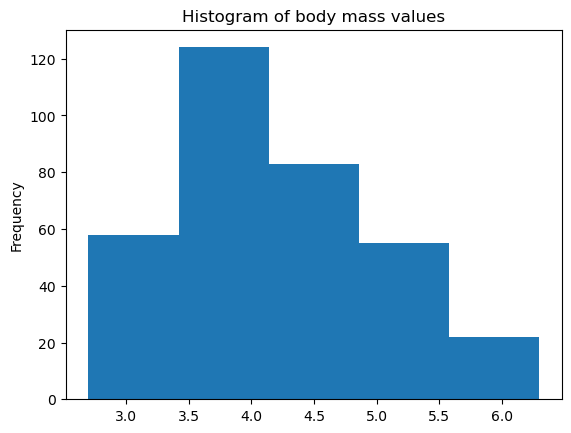

In [29]:
print('Plot A: 5 Bins')
fig = penguins['body_mass_g'].plot(kind='hist', title='Histogram of body mass values', bins=5)

Plot B: 10 Bins


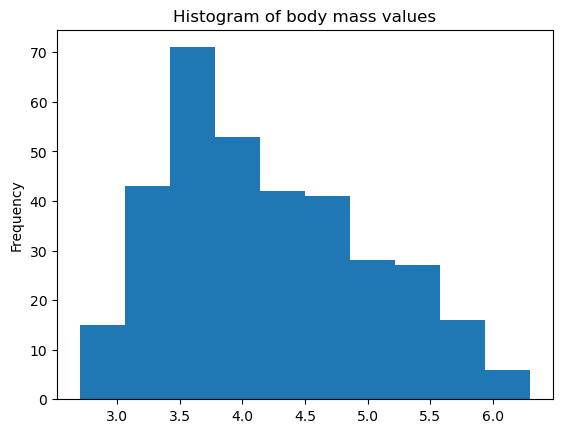

In [30]:
print('Plot B: 10 Bins')
fig = penguins['body_mass_g'].plot(kind='hist', title='Histogram of body mass values', bins=10)

Plot C: 20 bins


<Axes: title={'center': 'Histogram of body mass values'}, ylabel='Frequency'>

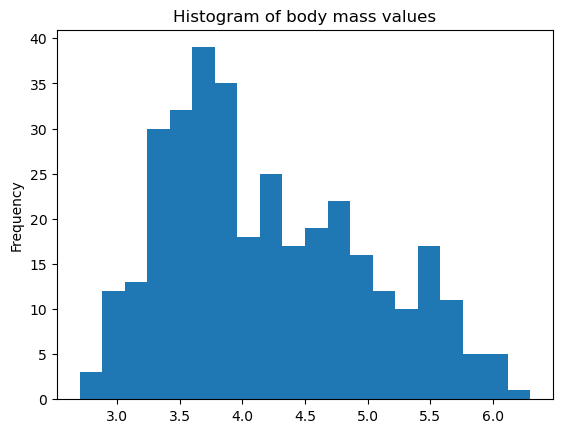

In [31]:
print('Plot C: 20 bins')
penguins['body_mass_g'].plot(kind='hist',
                             title='Histogram of body mass values', bins=20)

### Scatter Plots

Scatter plots visualize bivariate relationships. We can create a scatter plot by specifying the columns to use for the `x` and `y` axes. Notice that instead of calling it on a single column of data, we are using `df.plot(kind='scatter')`.

**Question:** Do you notice any pattern in the data? What might be causing that pattern?

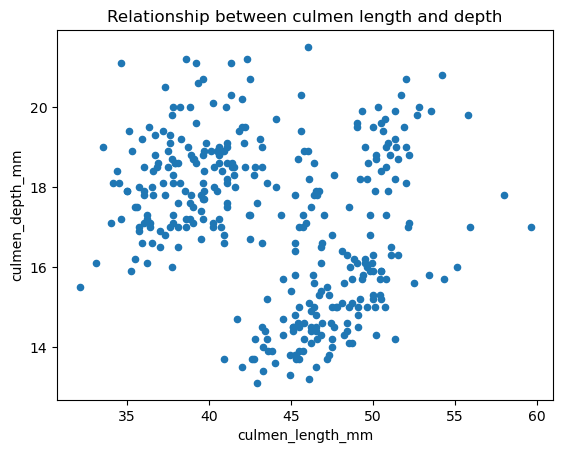

In [32]:
fig = penguins.plot(kind='scatter',
              x='culmen_length_mm',
              y='culmen_depth_mm',
              title='Relationship between culmen length and depth')

## Challenge 4: Customizing a Plot

One intuition may be that different penguin species have different culemtn length/depth, resulting in the pattern observed in the scatterplot above. Let's say we want to explore this pattern by plotting the data for each species in a different color. This will allow us to visualize this pattern if is present.

The way we implement this in plotting is by plotting individual layers for each species. Most visualizations treat images as "layers" on the backend. This allows us to create customizations to plots pretty easily, because each customization would be a new "layer".

So let's try it! Specifically, we want to visualize the culmen depth vs. the culmen length for each of the penguin species separately. We'll use different colors for each species.

To do this, we set the first layer equal to the variable `fig`. This represents our plot. All of our plots thus far have had a single layer. To include multiple layers in a plot, we simply include the argument `ax=fig` in any subsequent layers. This tells `pandas` to put new layers on the original plot rather than to make a new plot.

Follow the steps below to make your own layered visualization!

1. Make three different sub-DataFrames, one for each species, using `.loc[]` and a Boolean mask. (**Hint:** This is the solution to Challenge 3)
2. Plot the first layer and set it equal to `fig`.
3. Plot subsequent layers. Use a different color for each species (look at the documentation for the name of the color parameter). Some possible colors to use are `'green'`, `'red'`, `'purple'`, `'black'`, etc. (Remember to include the argument `ax=fig`!)
4. Do you notice a pattern in culmen measurements based on species? What other elements for the plot would be helpful for interpreting it?

**Bonus:** Add a title and any other modifications to the plot (better x and y labels, for example).

In [ ]:
# YOUR CODE HERE

# Subset Data 
chinstrap = 
adelie = 
gentoo = 

# Create plot
fig = # First layer
# Plot other layers


For more on data visualization, check out D-Lab's [Python Data Visualization workshop](https://github.com/dlab-berkeley/Python-Data-Visualization).